In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from matplotlib import colors 
import re
import string


In [277]:
df= pd.read_csv('DataScience_jobs.csv')

In [278]:
df.head(10)

,Unnamed: 0,roles,companies,locations,experience,skills
0,0,Data Scientist/ Academic Counselor,GREAT LAKES E-LEARNING SERVICES PRIVATE LIMITED,"Chennai, Bengaluru",2-7 Yrs,Data Science\nArtificial Intelligence\ntrainin...
1,1,Data Scientist,Shell India Markets Private Limited,Chennai,5-7 Yrs,Data Science\nMultivariate Analysis\nFactor An...
2,2,Senior Data Scientist,Decision Point,Gurgaon,3-5 Yrs,Azure\ntimeseries forecasting\nMachine Learnin...
3,3,Data Scientist - Machine Learning & Statistica...,Talent Stock Solutions,Delhi,2-5 Yrs,Data Science\nR\nC\nData Scientist\nStatistica...
4,4,Data Scientist,Zen3Tech (A Tech Mahindra Company),Hyderabad,3-8 Yrs,R\nA/B Testing\nData Manipulation\nMachine Lea...
5,5,Data Scientist,Extentia Information Technology Pvt Ltd,Pune,0-2 Yrs,Machine Learning\nPython
6,6,Data Scientist,KONE Elevator India Pvt. Ltd,Pune,3-5 Yrs,predictive algorithms\nK-Means\nGithub\nGenera...
7,7,Data Scientist | Integreon Managed Solutions |...,INTEGREON MANAGED SOLUTIONS INDIA PVT LIMITED,Mumbai,2-7 Yrs,analytics\npython\ntableau\nregression\npredic...
8,8,Data Scientist,Bigshyft Hiring for Indus OS,Mumbai,2-5 Yrs,cassandra\nScala\nHadoop\nSpark\nPython
9,9,Senior Data Scientist (NLP),Visible Alpha Solutions India Pvt. Ltd.,Mumbai,5-7 Yrs,Java\nR\nNLP\nAlgorithms\nLinux\nWeb Technolog...


In [279]:
df.describe()

,Unnamed: 0
count,1282.000000
mean,640.500000
std,370.225832
min,0.000000
25%,320.250000
50%,640.500000
75%,960.750000
max,1281.000000


In [280]:
df.drop(df.columns[[0]],axis=1,inplace=True)
df.head(10)

,roles,companies,locations,experience,skills
0,Data Scientist/ Academic Counselor,GREAT LAKES E-LEARNING SERVICES PRIVATE LIMITED,"Chennai, Bengaluru",2-7 Yrs,Data Science\nArtificial Intelligence\ntrainin...
1,Data Scientist,Shell India Markets Private Limited,Chennai,5-7 Yrs,Data Science\nMultivariate Analysis\nFactor An...
2,Senior Data Scientist,Decision Point,Gurgaon,3-5 Yrs,Azure\ntimeseries forecasting\nMachine Learnin...
3,Data Scientist - Machine Learning & Statistica...,Talent Stock Solutions,Delhi,2-5 Yrs,Data Science\nR\nC\nData Scientist\nStatistica...
4,Data Scientist,Zen3Tech (A Tech Mahindra Company),Hyderabad,3-8 Yrs,R\nA/B Testing\nData Manipulation\nMachine Lea...
5,Data Scientist,Extentia Information Technology Pvt Ltd,Pune,0-2 Yrs,Machine Learning\nPython
6,Data Scientist,KONE Elevator India Pvt. Ltd,Pune,3-5 Yrs,predictive algorithms\nK-Means\nGithub\nGenera...
7,Data Scientist | Integreon Managed Solutions |...,INTEGREON MANAGED SOLUTIONS INDIA PVT LIMITED,Mumbai,2-7 Yrs,analytics\npython\ntableau\nregression\npredic...
8,Data Scientist,Bigshyft Hiring for Indus OS,Mumbai,2-5 Yrs,cassandra\nScala\nHadoop\nSpark\nPython
9,Senior Data Scientist (NLP),Visible Alpha Solutions India Pvt. Ltd.,Mumbai,5-7 Yrs,Java\nR\nNLP\nAlgorithms\nLinux\nWeb Technolog...


In [281]:
df.isnull().sum()

roles         0
companies     0
locations     0
experience    0
skills        3
dtype: int64

In [282]:
df = df.dropna()

In [283]:
df.isnull().sum()

roles         0
companies     0
locations     0
experience    0
skills        0
dtype: int64

In [284]:
df['roles'].nunique()

578

In [285]:
df

,roles,companies,locations,experience,skills
0,Data Scientist/ Academic Counselor,GREAT LAKES E-LEARNING SERVICES PRIVATE LIMITED,"Chennai, Bengaluru",2-7 Yrs,Data Science\nArtificial Intelligence\ntrainin...
1,Data Scientist,Shell India Markets Private Limited,Chennai,5-7 Yrs,Data Science\nMultivariate Analysis\nFactor An...
2,Senior Data Scientist,Decision Point,Gurgaon,3-5 Yrs,Azure\ntimeseries forecasting\nMachine Learnin...
3,Data Scientist - Machine Learning & Statistica...,Talent Stock Solutions,Delhi,2-5 Yrs,Data Science\nR\nC\nData Scientist\nStatistica...
4,Data Scientist,Zen3Tech (A Tech Mahindra Company),Hyderabad,3-8 Yrs,R\nA/B Testing\nData Manipulation\nMachine Lea...
...,...,...,...,...,...
1277,ML/AI Intern,AgNext Technologies ( India's leading Agri Tec...,"Mohali, Gurgaon",1-3 Yrs,Computer vision\ndeep learning\nC++\nImage pro...
1278,FR & D Scientist,Dr. Reddys Laboratories Ltd.,Hyderabad,3-7 Yrs,Product quality\nOperational excellence\nPharm...
1279,FR & D Scientist,Dr. Reddys Laboratories Ltd.,Hyderabad,2-5 Yrs,Product quality\nOperational excellence\nPharm...
1280,Analyst/senior Analyst - Fraud Analytics,bluCognition Private Limited,Pune,3-5 Yrs,Data Science\nPyspark\nR\nSAS SQL\nHive\nBig D...



# Exploratoty Data Analysis

# To analyse the location having more opportunities

In [286]:
dfp = df['roles'].value_counts().head(10).sort_values(ascending = True).reset_index()
dfl = df['locations'].value_counts().head(10).sort_values(ascending = True).reset_index()
dfc = df['companies'].value_counts().head(10).sort_values(ascending = True).reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(x = dfp['roles'],
                     y = dfp['index'],
                     orientation='h',
                     name = 'roles',
                     marker = dict(color = 'LightCoral')))

fig.add_trace(go.Bar(x = dfl['locations'],
                     y = dfl['index'],
                     orientation='h',
                     name = 'Locations',
                     marker = dict(color = 'CadetBlue')))

fig.add_trace(go.Bar(x = dfc['companies'],
                     y = dfc['index'],
                     orientation='h',
                     name = 'Company',
                     marker = dict(color = 'SteelBlue')))

fig.update_layout( 
    updatemenus=[ 
        dict( 
            type = "buttons",
            direction="left", 
            pad={"r": 10, "t": 10},
            showactive=True, 
            x=0.16, 
            xanchor="left",
            y=1.12, 
            yanchor="top",
            font = dict(color = 'Indigo',size = 14),
            buttons=list([ 
                dict(label="All", 
                     method="update", 
                     args=[ {"visible": [True, True, True]}, 
                            {'showlegend' : True} 
                        ]),
                dict(label="roles", 
                     method="update", 
                     args=[ {"visible": [True, False, False]}, 
                            {'showlegend' : True} 
                        ]), 
                dict(label='Location', 
                     method="update", 
                     args=[ {"visible": [False, True, False]}, 
                            {'showlegend' : True} 
                     ]), 
                dict(label='Company', 
                     method="update", 
                     args=[ {"visible": [False, False, True]}, 
                            {'showlegend' : True}]),
            ]),
        )])

fig.update_layout(
    annotations=[
        dict(text="Choose:", showarrow=False,
             x=0, y=1.075, yref="paper", align="right",
             font=dict(size=16,color = 'DarkSlateBlue'))])

fig.update_layout(title ="Top 10 roles, Locations and Companies",
                  title_x = 0.5,
                  title_font = dict(size = 20, color = 'MidnightBlue'))

fig.show()

In [287]:
new = df["experience"].str.split("-", n=1,expand = True)
df["min_experience"] = new[0]
df["max_experience"] = new[1]

max_experience = df["max_experience"].str.split(" ",n=1,expand = True)
df["max_experience"]=max_experience[0]

df.head(10)

,roles,companies,locations,experience,skills,min_experience,max_experience
0,Data Scientist/ Academic Counselor,GREAT LAKES E-LEARNING SERVICES PRIVATE LIMITED,"Chennai, Bengaluru",2-7 Yrs,Data Science\nArtificial Intelligence\ntrainin...,2,7
1,Data Scientist,Shell India Markets Private Limited,Chennai,5-7 Yrs,Data Science\nMultivariate Analysis\nFactor An...,5,7
2,Senior Data Scientist,Decision Point,Gurgaon,3-5 Yrs,Azure\ntimeseries forecasting\nMachine Learnin...,3,5
3,Data Scientist - Machine Learning & Statistica...,Talent Stock Solutions,Delhi,2-5 Yrs,Data Science\nR\nC\nData Scientist\nStatistica...,2,5
4,Data Scientist,Zen3Tech (A Tech Mahindra Company),Hyderabad,3-8 Yrs,R\nA/B Testing\nData Manipulation\nMachine Lea...,3,8
5,Data Scientist,Extentia Information Technology Pvt Ltd,Pune,0-2 Yrs,Machine Learning\nPython,0,2
6,Data Scientist,KONE Elevator India Pvt. Ltd,Pune,3-5 Yrs,predictive algorithms\nK-Means\nGithub\nGenera...,3,5
7,Data Scientist | Integreon Managed Solutions |...,INTEGREON MANAGED SOLUTIONS INDIA PVT LIMITED,Mumbai,2-7 Yrs,analytics\npython\ntableau\nregression\npredic...,2,7
8,Data Scientist,Bigshyft Hiring for Indus OS,Mumbai,2-5 Yrs,cassandra\nScala\nHadoop\nSpark\nPython,2,5
9,Senior Data Scientist (NLP),Visible Alpha Solutions India Pvt. Ltd.,Mumbai,5-7 Yrs,Java\nR\nNLP\nAlgorithms\nLinux\nWeb Technolog...,5,7


In [288]:
dfd1 = df[df['roles']== 'Data Scientist']
dfd2 = df[df['roles']== 'Senior Data Scientist']
dfd3 = df[df['roles']== 'Lead Data Scientist']
dfd4 = df[df['roles']== 'Full Stack Data Scientist']

redf1 = dfd1["locations"].value_counts()[:10].reset_index()
redf2 = dfd2['locations'].value_counts()[:10].reset_index()
redf3 = dfd3['locations'].value_counts()[:10].reset_index()
redf4 = dfd4['locations'].value_counts()[:10].reset_index()


fig = go.Figure()

fig.add_trace(go.Bar(x = redf1["index"],
                     y = redf1["locations"],
                     marker = dict(color = 'Tomato'),
                     name = 'Data Scientist'))

fig.add_trace(go.Bar(x = redf2['index'],
                     y = redf2['locations'],
                     name = 'Senior Data Scientist',
                     marker = dict(color = 'LightCoral')))

fig.add_trace(go.Bar(x = redf3['index'],
                     y = redf3['locations'],
                     name = 'Lead Data Scientist',
                     marker = dict(color = 'SteelBlue')))

fig.add_trace(go.Bar(x = redf4['index'],
                     y = redf4['locations'],
                     name = 'Full Stack Data Scientist',
                     marker = dict(color = 'CadetBlue')))

fig.update_layout( 
    updatemenus=[ 
        dict( 
            direction="down", 
            pad={"r": 10, "t": 10},
            showactive=True, 
            x=0.13, 
            xanchor="left",
            y=1.12, 
            yanchor="top",
            font = dict(color = 'Indigo',size = 14),
            buttons=list([ 
                dict(label="All", 
                     method="update", 
                     args=[ {"visible": [True, True, True,True]}, 
                            {'showlegend' : True} 
                        ]),
                dict(label="Data Scientist", 
                     method="update", 
                     args=[ {"visible": [True, False, False,False]}, 
                            {'showlegend' : True} 
                        ]), 
                dict(label='Senior Data Scientist', 
                     method="update", 
                     args=[ {"visible": [False, True, False,False]}, 
                            {'showlegend' : True} 
                     ]), 
                dict(label='Lead Data Scientist', 
                     method="update", 
                     args=[ {"visible": [False, False, True,False]}, 
                            {'showlegend' : True} 
                        ]),  
                dict(label='Full Stack Data Scientist', 
                     method="update", 
                     args=[ {"visible": [False, False,False,True]}, 
                            {'showlegend' : True}]),
            ]),
        )])

fig.update_layout(
    annotations=[
        dict(text="Choose:", showarrow=False,
             x=0, y=1.075, yref="paper", align="right",
             font=dict(size=16,color = 'DarkSlateBlue'))])

fig.update_layout(title ="The distribution of states by four roles",
                  title_x = 0.5,
                  title_font = dict(size = 20, color = 'MidnightBlue'))

fig.show()

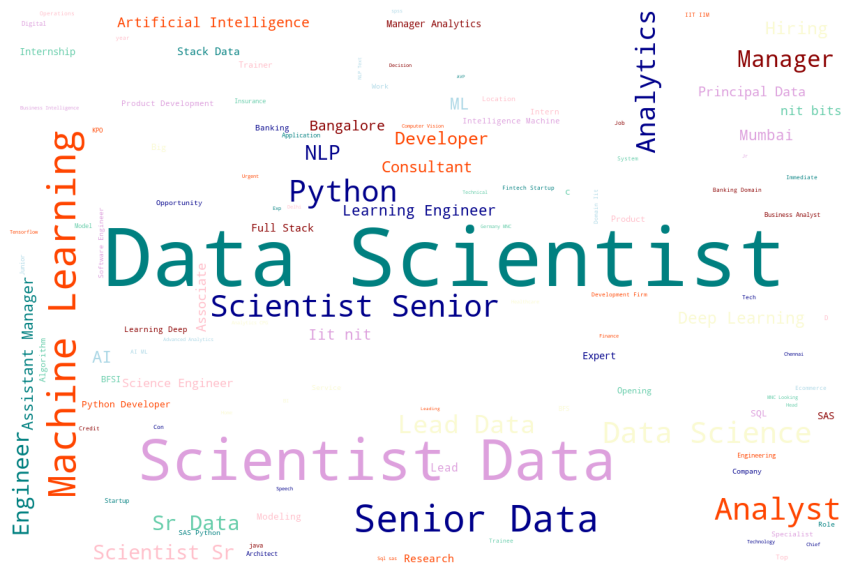

In [289]:
color_list=  ['DarkBlue','Teal','LightBlue','MediumAquamarine','Plum','OrangeRed','DarkRed','Pink','LightGoldenrodYellow']

colormap = colors.ListedColormap(color_list)

plt.rcParams['figure.figsize'] = (15,15)

wordcloud =  WordCloud(background_color= 'white',
                       width = 1200,height = 800 ,
                       max_words = 120,colormap = colormap ).generate(" ".join(df['roles']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# To analyse the domain skill, the companies look for the most:


In [290]:
df.skills.values[0][0:int(len(df.skills.values[0])/2)]

'Data Science\nArtificial Intelligence\ntra'

In [291]:
df.head(5)

,roles,companies,locations,experience,skills,min_experience,max_experience
0,Data Scientist/ Academic Counselor,GREAT LAKES E-LEARNING SERVICES PRIVATE LIMITED,"Chennai, Bengaluru",2-7 Yrs,Data Science\nArtificial Intelligence\ntrainin...,2,7
1,Data Scientist,Shell India Markets Private Limited,Chennai,5-7 Yrs,Data Science\nMultivariate Analysis\nFactor An...,5,7
2,Senior Data Scientist,Decision Point,Gurgaon,3-5 Yrs,Azure\ntimeseries forecasting\nMachine Learnin...,3,5
3,Data Scientist - Machine Learning & Statistica...,Talent Stock Solutions,Delhi,2-5 Yrs,Data Science\nR\nC\nData Scientist\nStatistica...,2,5
4,Data Scientist,Zen3Tech (A Tech Mahindra Company),Hyderabad,3-8 Yrs,R\nA/B Testing\nData Manipulation\nMachine Lea...,3,8


In [292]:
df1=df

In [293]:
df1 = df1.groupby('roles').agg(lambda col: ' '.join(col))
df1 = df1[['skills']]

In [294]:
df1.head(5)

,skills
roles,
.1787_Data Scientist _Bangalore,Data Science\nPredictive Modeling\nR\nNeural N...
A Data Scientists,Computer science\nData analysis\nOperations re...
ADAS Data Analytics Algorithm & Application Development,Object Detection\nScipy\nADAS Data Analytics\n...
AGM Data Scientist - Top Durable Brand - Mumbai,data science\nteam role\nmachine learning\nmar...
AI / ML Data Scientist - Democratize commerce through Technology,Computer science\nSystem architecture\nC++\nIm...


In [295]:
def clean_text(text):
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text).lower() 
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n',' ',text)
    return text

In [296]:
clean = lambda x :clean_text(x)
df1_clean = pd.DataFrame(df1.skills.apply(clean))

In [297]:
lemmer = WordNetLemmatizer()
df1_clean['skills'] = df1_clean.skills.apply(lambda x: word_tokenize(x))
df1_clean['skills'] = df1_clean.skills.apply(lambda x : [lemmer.lemmatize(y) for y in x])
df1_clean['skills'] = df1_clean.skills.apply(lambda x: ' '.join(x))

In [298]:
# Add words that frequently appear in the skills but carry no value to the list of stop words
from sklearn.feature_extraction import text
extra_stopword = ['data','experience','work','team','will','skill','year','skills']
stop_words = text.ENGLISH_STOP_WORDS.union(extra_stopword)

ValueError: num must be 1 <= num <= 4, not 5

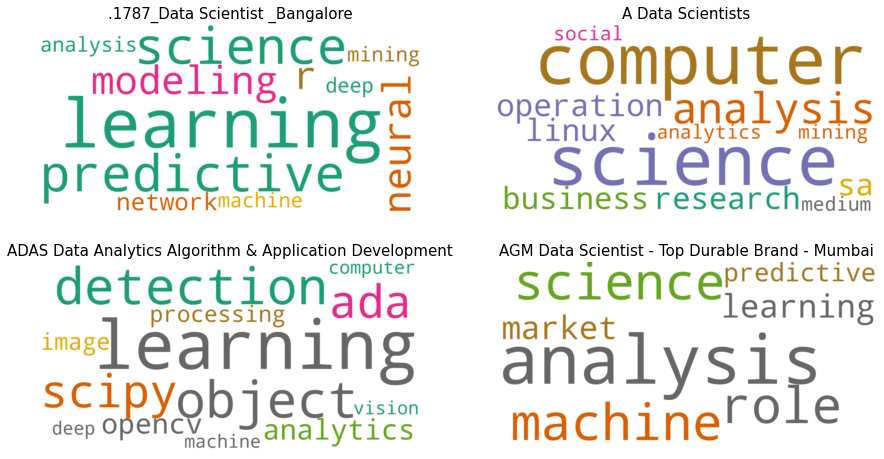

In [358]:

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
             random_state=42, collocations = False, width=1600, height=800)
i = 0
fig = plt.figure(figsize=(15,8))
for x in df1_clean.skills.index:
    wc.generate(df1_clean.skills[str(x)])
    
    i=i+1
    fig.add_subplot(2,2, i)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(str(x), size = 15)
plt.show()

# To analyse the Skills required to develop 

In [300]:
def count_text(patt,text):
    pattern = re.compile(patt)
    count = 0
    for t in text:
        if pattern.search(t):
            count+=1
    return count

In [301]:
# Create a data frame with skills name and regex pattern to search with
skills1 = ['R','Python','Hadoop','SQL','Tableau','TensorFlow','Agile','Power BI','SaS','Algorithm','Java','Visualization',
           'Opencv','DataMining','Statistics','NLP']

skill_patt = ['\WR\W+\s?','(?i)\WPython\W?','(?i)\WHadoop\W?','(?i)\WSQL\W?','(?i)\WTableau\W?',
              "(?i)\WTensorFlow\W?","(?i)\WAgile\W?","(?i)\WPower\s?BI\W?",
             "(?i)\WSAS\W?","(?i)\WAlgorithms?\W?",'(?i)\WJava\w?','(?i)\WVisualization\W?','(?i)\WOpencv\W?',
              '(?i)\WDataMining\W?','(?i)\WStatistics\W?','(?i)\WNLP\W?']

skill_df =pd.DataFrame(
    {"skill1": skills1,
     "regex_pattern":skill_patt})

In [302]:
# Iterate through the list of skill using the search function created
i = []
for x in skill_df['regex_pattern']:
    i.append(count_text(x,df['skills']))
skill_df['count'] = i
skill_df['ptg'] = round(skill_df['count']/len(df['skills']),2)
skill_df

,skill1,regex_pattern,count,ptg
0,R,\WR\W+\s?,133,0.10
1,Python,(?i)\WPython\W?,274,0.21
2,Hadoop,(?i)\WHadoop\W?,61,0.05
3,SQL,(?i)\WSQL\W?,157,0.12
4,Tableau,(?i)\WTableau\W?,62,0.05
5,TensorFlow,(?i)\WTensorFlow\W?,35,0.03
6,Agile,(?i)\WAgile\W?,36,0.03
7,Power BI,(?i)\WPower\s?BI\W?,15,0.01
8,SaS,(?i)\WSAS\W?,141,0.11
9,Algorithm,(?i)\WAlgorithms?\W?,84,0.07


<ipython-input-303-5e07cc4898bf>:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



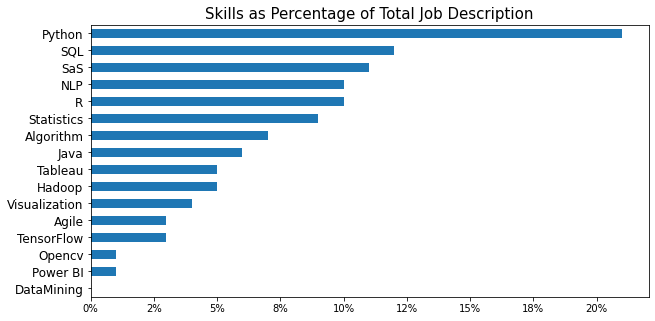

In [303]:
x = skill_df.sort_values(by = 'ptg')
ax =x['ptg'].plot(kind = "barh",figsize = (10,5))
ax.set_title('Skills as Percentage of Total Job Description', size = 15)
ax.set_yticklabels(x['skill1'], size = 12)
ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])
plt.show()

# Minimum and maximum experience required

In [304]:
df

,roles,companies,locations,experience,skills,min_experience,max_experience
0,Data Scientist/ Academic Counselor,GREAT LAKES E-LEARNING SERVICES PRIVATE LIMITED,"Chennai, Bengaluru",2-7 Yrs,Data Science\nArtificial Intelligence\ntrainin...,2,7
1,Data Scientist,Shell India Markets Private Limited,Chennai,5-7 Yrs,Data Science\nMultivariate Analysis\nFactor An...,5,7
2,Senior Data Scientist,Decision Point,Gurgaon,3-5 Yrs,Azure\ntimeseries forecasting\nMachine Learnin...,3,5
3,Data Scientist - Machine Learning & Statistica...,Talent Stock Solutions,Delhi,2-5 Yrs,Data Science\nR\nC\nData Scientist\nStatistica...,2,5
4,Data Scientist,Zen3Tech (A Tech Mahindra Company),Hyderabad,3-8 Yrs,R\nA/B Testing\nData Manipulation\nMachine Lea...,3,8
...,...,...,...,...,...,...,...
1277,ML/AI Intern,AgNext Technologies ( India's leading Agri Tec...,"Mohali, Gurgaon",1-3 Yrs,Computer vision\ndeep learning\nC++\nImage pro...,1,3
1278,FR & D Scientist,Dr. Reddys Laboratories Ltd.,Hyderabad,3-7 Yrs,Product quality\nOperational excellence\nPharm...,3,7
1279,FR & D Scientist,Dr. Reddys Laboratories Ltd.,Hyderabad,2-5 Yrs,Product quality\nOperational excellence\nPharm...,2,5
1280,Analyst/senior Analyst - Fraud Analytics,bluCognition Private Limited,Pune,3-5 Yrs,Data Science\nPyspark\nR\nSAS SQL\nHive\nBig D...,3,5


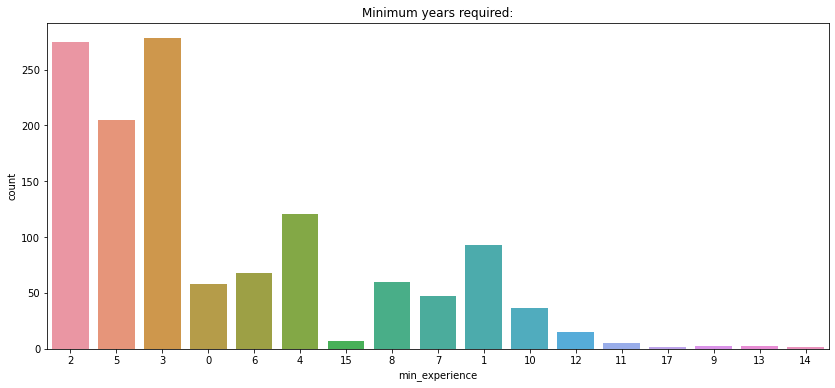

In [305]:
fig,ax=plt.subplots(figsize=(14,6))
# count plot on single categorical variable
sns.countplot(x =df['min_experience'], data = df)
# Show the plot
plt.title("Minimum years required:")
plt.show()

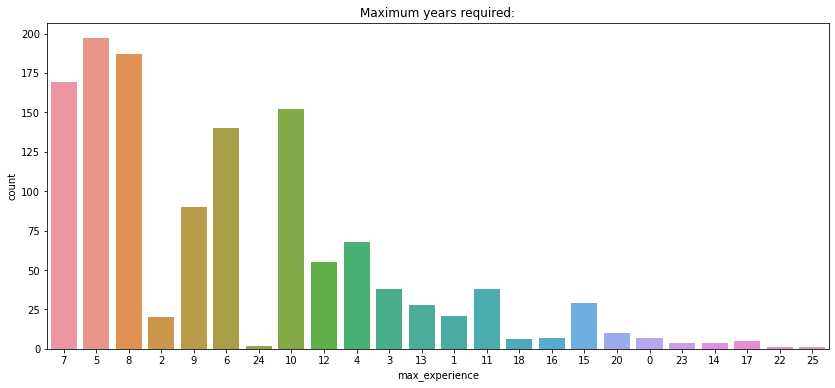

In [306]:
fig,ax=plt.subplots(figsize=(14,6))
# count plot on single categorical variable
plt.title("Maximum years required:")
sns.countplot(x =df['max_experience'], data = df)
# Show the plot
plt.show()

#  Data Preprocessing

In [307]:
df.head(5)

,roles,companies,locations,experience,skills,min_experience,max_experience
0,Data Scientist/ Academic Counselor,GREAT LAKES E-LEARNING SERVICES PRIVATE LIMITED,"Chennai, Bengaluru",2-7 Yrs,Data Science\nArtificial Intelligence\ntrainin...,2,7
1,Data Scientist,Shell India Markets Private Limited,Chennai,5-7 Yrs,Data Science\nMultivariate Analysis\nFactor An...,5,7
2,Senior Data Scientist,Decision Point,Gurgaon,3-5 Yrs,Azure\ntimeseries forecasting\nMachine Learnin...,3,5
3,Data Scientist - Machine Learning & Statistica...,Talent Stock Solutions,Delhi,2-5 Yrs,Data Science\nR\nC\nData Scientist\nStatistica...,2,5
4,Data Scientist,Zen3Tech (A Tech Mahindra Company),Hyderabad,3-8 Yrs,R\nA/B Testing\nData Manipulation\nMachine Lea...,3,8


In [308]:
new = df["roles"].str.split("/", n=1,expand = True)
df["role1"] = new[0]


In [309]:
new = df["role1"].str.split("-", n=1,expand = True)
df["role2"] = new[0]



In [310]:
new = df["role2"].str.split("|", n=1,expand = True)
df["role3"] = new[0]



In [311]:
new = df["role3"].str.split(",", n=1,expand = True)
df["Roles"] = new[0]


In [312]:
df.drop(df.columns[[0,3,7,8,9]],axis=1,inplace=True)
df.head(10)

,companies,locations,skills,min_experience,max_experience,Roles
0,GREAT LAKES E-LEARNING SERVICES PRIVATE LIMITED,"Chennai, Bengaluru",Data Science\nArtificial Intelligence\ntrainin...,2,7,Data Scientist
1,Shell India Markets Private Limited,Chennai,Data Science\nMultivariate Analysis\nFactor An...,5,7,Data Scientist
2,Decision Point,Gurgaon,Azure\ntimeseries forecasting\nMachine Learnin...,3,5,Senior Data Scientist
3,Talent Stock Solutions,Delhi,Data Science\nR\nC\nData Scientist\nStatistica...,2,5,Data Scientist
4,Zen3Tech (A Tech Mahindra Company),Hyderabad,R\nA/B Testing\nData Manipulation\nMachine Lea...,3,8,Data Scientist
5,Extentia Information Technology Pvt Ltd,Pune,Machine Learning\nPython,0,2,Data Scientist
6,KONE Elevator India Pvt. Ltd,Pune,predictive algorithms\nK-Means\nGithub\nGenera...,3,5,Data Scientist
7,INTEGREON MANAGED SOLUTIONS INDIA PVT LIMITED,Mumbai,analytics\npython\ntableau\nregression\npredic...,2,7,Data Scientist
8,Bigshyft Hiring for Indus OS,Mumbai,cassandra\nScala\nHadoop\nSpark\nPython,2,5,Data Scientist
9,Visible Alpha Solutions India Pvt. Ltd.,Mumbai,Java\nR\nNLP\nAlgorithms\nLinux\nWeb Technolog...,5,7,Senior Data Scientist (NLP)


In [313]:
new = df["locations"].str.split(",", n=1,expand = True)
df["location"] = new[0]
df.drop(df.columns[[1]],axis=1,inplace=True)
df.head(5)

,companies,skills,min_experience,max_experience,Roles,location
0,GREAT LAKES E-LEARNING SERVICES PRIVATE LIMITED,Data Science\nArtificial Intelligence\ntrainin...,2,7,Data Scientist,Chennai
1,Shell India Markets Private Limited,Data Science\nMultivariate Analysis\nFactor An...,5,7,Data Scientist,Chennai
2,Decision Point,Azure\ntimeseries forecasting\nMachine Learnin...,3,5,Senior Data Scientist,Gurgaon
3,Talent Stock Solutions,Data Science\nR\nC\nData Scientist\nStatistica...,2,5,Data Scientist,Delhi
4,Zen3Tech (A Tech Mahindra Company),R\nA/B Testing\nData Manipulation\nMachine Lea...,3,8,Data Scientist,Hyderabad


In [314]:
new = df["skills"].str.split("\n", n=1,expand = True)
df["Main skill"] = new[0]
df["Secondary skills"]=new[1]
#df.head(5)

In [315]:
new = df["Secondary skills"].str.split("\n", n=1,expand = True)
df["skill1"] = new[0]
df["skill1.1"]=new[1]


In [316]:
#df.head(5)

In [317]:
new = df["skill1.1"].str.split("\n", n=1,expand = True)
df["skill2"] = new[0]
df["skill2.2"]=new[1]


In [318]:
new = df["skill2.2"].str.split("\n", n=1,expand = True)
df["skill3"] = new[0]


In [319]:
df.drop(df.columns[[1,7,9,11]],axis=1,inplace=True)
df.head(10)

,companies,min_experience,max_experience,Roles,location,Main skill,skill1,skill2,skill3
0,GREAT LAKES E-LEARNING SERVICES PRIVATE LIMITED,2,7,Data Scientist,Chennai,Data Science,Artificial Intelligence,training,Tableau
1,Shell India Markets Private Limited,5,7,Data Scientist,Chennai,Data Science,Multivariate Analysis,Factor Analysis,Natural Language Processing
2,Decision Point,3,5,Senior Data Scientist,Gurgaon,Azure,timeseries forecasting,Machine Learning Models,data analytics
3,Talent Stock Solutions,2,5,Data Scientist,Delhi,Data Science,R,C,Data Scientist
4,Zen3Tech (A Tech Mahindra Company),3,8,Data Scientist,Hyderabad,R,A/B Testing,Data Manipulation,Machine Learning
5,Extentia Information Technology Pvt Ltd,0,2,Data Scientist,Pune,Machine Learning,Python,None,None
6,KONE Elevator India Pvt. Ltd,3,5,Data Scientist,Pune,predictive algorithms,K-Means,Github,Generalized Linear Model
7,INTEGREON MANAGED SOLUTIONS INDIA PVT LIMITED,2,7,Data Scientist,Mumbai,analytics,python,tableau,regression
8,Bigshyft Hiring for Indus OS,2,5,Data Scientist,Mumbai,cassandra,Scala,Hadoop,Spark
9,Visible Alpha Solutions India Pvt. Ltd.,5,7,Senior Data Scientist (NLP),Mumbai,Java,R,NLP,Algorithms



# To convert categorical values ino numerical values

In [320]:
df.drop(df.columns[[0,7,-1]],axis=1,inplace=True)
df.head(4)

,min_experience,max_experience,Roles,location,Main skill,skill1
0,2,7,Data Scientist,Chennai,Data Science,Artificial Intelligence
1,5,7,Data Scientist,Chennai,Data Science,Multivariate Analysis
2,3,5,Senior Data Scientist,Gurgaon,Azure,timeseries forecasting
3,2,5,Data Scientist,Delhi,Data Science,R


In [321]:
df=df.rename(columns={'skill1':'Other skill'})
df.head(4)

,min_experience,max_experience,Roles,location,Main skill,Other skill
0,2,7,Data Scientist,Chennai,Data Science,Artificial Intelligence
1,5,7,Data Scientist,Chennai,Data Science,Multivariate Analysis
2,3,5,Senior Data Scientist,Gurgaon,Azure,timeseries forecasting
3,2,5,Data Scientist,Delhi,Data Science,R


In [322]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['location']=le.fit_transform(df['location'])
df.head(5)

,min_experience,max_experience,Roles,location,Main skill,Other skill
0,2,7,Data Scientist,14,Data Science,Artificial Intelligence
1,5,7,Data Scientist,14,Data Science,Multivariate Analysis
2,3,5,Senior Data Scientist,29,Azure,timeseries forecasting
3,2,5,Data Scientist,21,Data Science,R
4,3,8,Data Scientist,32,R,A/B Testing


In [323]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Roles']=le.fit_transform(df['Roles'])
df.head(5)

,min_experience,max_experience,Roles,location,Main skill,Other skill
0,2,7,86,14,Data Science,Artificial Intelligence
1,5,7,86,14,Data Science,Multivariate Analysis
2,3,5,279,29,Azure,timeseries forecasting
3,2,5,87,21,Data Science,R
4,3,8,86,32,R,A/B Testing


In [324]:
#from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()
#df['Main skill']=le.fit_transform(df['Main skill'])
#df.head(5)

# Kmeans clustering

In [325]:
X = df.iloc[:,2:4].values
X

array([[ 86,  14],
       [ 86,  14],
       [279,  29],
       ...,
       [146,  32],
       [ 14,  63],
       [250,   5]])

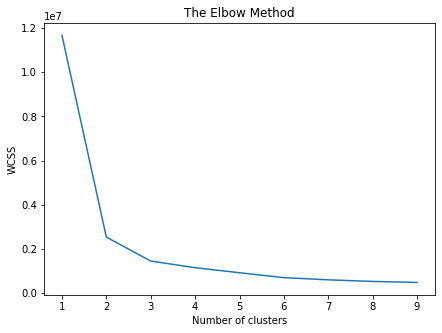

In [339]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [340]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

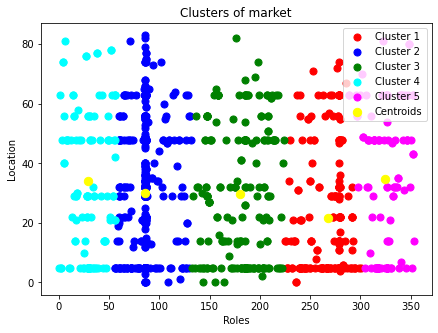

In [343]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 70, c = 'yellow', label = 'Centroids')
plt.title('Clusters of market')
plt.xlabel('Roles')
plt.ylabel('Location')
plt.legend()
plt.show()

In [344]:
df['cluster']=y_kmeans

In [345]:
df.head(4)

,min_experience,max_experience,Roles,location,Main skill,Other skill,cluster
0,2,7,86,14,Data Science,Artificial Intelligence,1
1,5,7,86,14,Data Science,Multivariate Analysis,1
2,3,5,279,29,Azure,timeseries forecasting,0
3,2,5,87,21,Data Science,R,1


y_kmeans

# Describing segments

# Cluster vs min experience

In [346]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
crosstab=pd.crosstab(df['cluster'],df['min_experience'])
crosstab

min_experience,0,1,10,11,12,13,14,15,17,2,3,4,5,6,7,8,9
cluster,,,,,,,,,,,,,,,,,
0,7,11,10,1,0,0,0,0,0,39,33,20,56,19,11,17,1
1,33,51,7,1,8,0,0,0,2,170,161,59,73,32,14,23,0
2,7,7,11,0,5,0,1,6,0,34,37,19,45,9,11,11,1
3,2,16,5,2,1,2,0,0,0,24,29,9,12,1,2,4,1
4,9,8,4,1,1,1,1,1,0,8,18,14,19,7,9,5,0


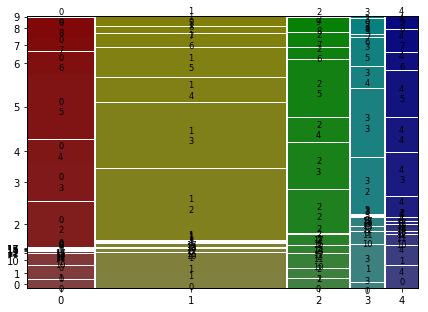

In [347]:
plt.rcParams['figure.figsize']=(7,5)
mosaic(crosstab.stack())
plt.show()

<AxesSubplot:xlabel='cluster', ylabel='min_experience'>

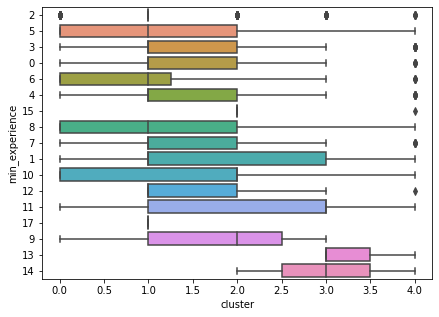

In [348]:
sns.boxplot(x='cluster',y='min_experience',data=df)

# cluster vs max_experience

In [349]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
crosstab1=pd.crosstab(df['cluster'],df['max_experience'])
crosstab1

max_experience,0,1,10,11,12,13,14,15,16,17,...,23,24,25,3,4,5,6,7,8,9
cluster,,,,,,,,,,,,,,,,,,,,,
0,1,4,41,11,15,6,1,8,0,1,...,0,0,0,1,15,27,16,25,23,28
1,2,10,63,19,13,13,0,9,3,2,...,2,0,0,24,38,131,86,94,83,32
2,1,3,25,4,13,7,1,3,3,2,...,0,2,0,3,4,17,12,30,47,15
3,0,0,9,0,6,0,2,5,0,0,...,2,0,0,8,11,11,16,11,14,6
4,3,4,14,4,8,2,0,4,1,0,...,0,0,1,2,0,11,10,9,20,9


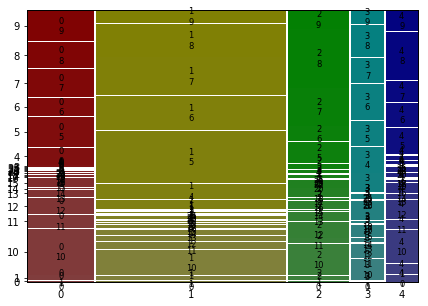

In [350]:
plt.rcParams['figure.figsize']=(7,5)
mosaic(crosstab1.stack())
plt.show()

<AxesSubplot:xlabel='cluster', ylabel='max_experience'>

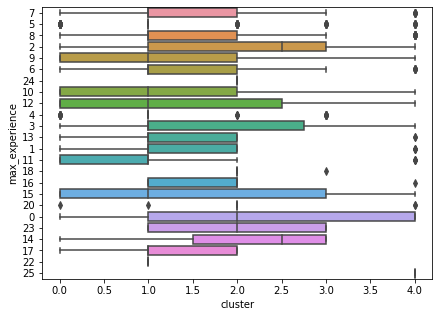

In [351]:
sns.boxplot(x='cluster',y='max_experience',data=df)

In [352]:
print(df['Other skill'])

0       Artificial Intelligence
1         Multivariate Analysis
2        timeseries forecasting
3                             R
4                   A/B Testing
                 ...           
1277              deep learning
1278     Operational excellence
1279     Operational excellence
1280                    Pyspark
1281                      spark
Name: Other skill, Length: 1279, dtype: object


In [353]:
df['Other skill'].nunique()

318